# Constrained Optimization MCP Server Demo

This notebook demonstrates the capabilities of the Constrained Optimization MCP Server for solving various optimization problems including:

1. **Constraint Satisfaction Problems** (Z3)
2. **Convex Optimization** (CVXPY)
3. **Linear Programming** (HiGHS)
4. **Constraint Programming** (OR-Tools)
5. **Portfolio Optimization**

## Table of Contents

1. [Setup and Installation](#setup)
2. [Constraint Satisfaction Problems (Z3)](#z3-examples)
3. [Convex Optimization (CVXPY)](#cvxpy-examples)
4. [Linear Programming (HiGHS)](#highs-examples)
5. [Constraint Programming (OR-Tools)](#ortools-examples)
6. [Portfolio Optimization](#portfolio-examples)
7. [Advanced Examples](#advanced-examples)
8. [Performance Analysis](#performance-analysis)

## Setup

First, let's import the necessary libraries and set up the MCP server.


In [3]:
# Install the package if not already installed
# !pip install constrained-opt-mcp

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Any, Optional
import json
import time
from datetime import datetime, timedelta

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print(f"📅 Demo started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


✅ Libraries imported successfully!
📅 Demo started at: 2025-09-13 11:12:21


## 📐 Mathematical Foundations

### Optimization Theory Overview

**Constrained Optimization** is the mathematical discipline of finding the best solution to a problem subject to constraints. The general form is:

$$\min_{x \in \mathbb{R}^n} f(x) \quad \text{subject to} \quad \begin{cases}
g_i(x) \leq 0, & i = 1, \ldots, m \\
h_j(x) = 0, & j = 1, \ldots, p \\
x \in \mathcal{X}
\end{cases}$$

Where:
- $f: \mathbb{R}^n \to \mathbb{R}$ is the **objective function**
- $g_i: \mathbb{R}^n \to \mathbb{R}$ are **inequality constraints**
- $h_j: \mathbb{R}^n \to \mathbb{R}$ are **equality constraints**
- $\mathcal{X} \subseteq \mathbb{R}^n$ is the **feasible region**

### Problem Classifications

#### 1. **Linear Programming (LP)**
$$\min_{x} c^T x \quad \text{subject to} \quad Ax \leq b, \quad x \geq 0$$

#### 2. **Quadratic Programming (QP)**
$$\min_{x} \frac{1}{2}x^T Q x + c^T x \quad \text{subject to} \quad Ax \leq b, \quad x \geq 0$$

#### 3. **Convex Optimization**
$$\min_{x} f(x) \quad \text{subject to} \quad g_i(x) \leq 0, \quad h_j(x) = 0$$

Where $f$ and $g_i$ are convex functions, and $h_j$ are affine functions.

#### 4. **Constraint Satisfaction Problems (CSP)**
Find $x \in \mathcal{D}$ such that $C_1(x) \land C_2(x) \land \ldots \land C_k(x)$

Where $\mathcal{D}$ is the domain and $C_i$ are logical constraints.

### Duality Theory

For any optimization problem, there exists a **dual problem**:

**Primal:** $\min_{x} f(x) \quad \text{s.t.} \quad g_i(x) \leq 0, \quad h_j(x) = 0$

**Dual:** $\max_{\lambda, \nu} \mathcal{L}(x^*, \lambda, \nu) \quad \text{s.t.} \quad \lambda \geq 0$

Where $\mathcal{L}(x, \lambda, \nu) = f(x) + \sum_i \lambda_i g_i(x) + \sum_j \nu_j h_j(x)$ is the **Lagrangian**.

### Optimality Conditions

#### Karush-Kuhn-Tucker (KKT) Conditions
For a solution $x^*$ to be optimal, there must exist multipliers $\lambda^* \geq 0$ and $\nu^*$ such that:

1. **Stationarity:** $\nabla f(x^*) + \sum_i \lambda_i^* \nabla g_i(x^*) + \sum_j \nu_j^* \nabla h_j(x^*) = 0$
2. **Primal feasibility:** $g_i(x^*) \leq 0, \quad h_j(x^*) = 0$
3. **Dual feasibility:** $\lambda_i^* \geq 0$
4. **Complementary slackness:** $\lambda_i^* g_i(x^*) = 0$


In [4]:
# MCP Server Setup
# Note: In a real environment, you would connect to the MCP server
# For this demo, we'll simulate the MCP server responses

class MCPServerSimulator:
    """Simulates MCP server responses for demonstration purposes"""
    
    def __init__(self):
        self.solvers = {
            'z3': self._simulate_z3_solver,
            'cvxpy': self._simulate_cvxpy_solver,
            'highs': self._simulate_highs_solver,
            'ortools': self._simulate_ortools_solver
        }
    
    def solve_constraint_satisfaction(self, problem_data: Dict) -> Dict:
        """Solve constraint satisfaction problems using Z3"""
        return self.solvers['z3'](problem_data)
    
    def solve_convex_optimization(self, problem_data: Dict) -> Dict:
        """Solve convex optimization problems using CVXPY"""
        return self.solvers['cvxpy'](problem_data)
    
    def solve_linear_programming(self, problem_data: Dict) -> Dict:
        """Solve linear programming problems using HiGHS"""
        return self.solvers['highs'](problem_data)
    
    def solve_constraint_programming(self, problem_data: Dict) -> Dict:
        """Solve constraint programming problems using OR-Tools"""
        return self.solvers['ortools'](problem_data)
    
    def solve_portfolio_optimization(self, problem_data: Dict) -> Dict:
        """Solve portfolio optimization problems"""
        return self.solvers['cvxpy'](problem_data)
    
    def _simulate_z3_solver(self, problem_data: Dict) -> Dict:
        """Simulate Z3 solver response"""
        return {
            "status": "SATISFIABLE",
            "solution": {"x": 5, "y": 3, "z": 2},
            "solver": "Z3",
            "solve_time": 0.15,
            "variables": list(problem_data.get("variables", {}).keys())
        }
    
    def _simulate_cvxpy_solver(self, problem_data: Dict) -> Dict:
        """Simulate CVXPY solver response"""
        return {
            "status": "OPTIMAL",
            "solution": {"x1": 0.3, "x2": 0.2, "x3": 0.3, "x4": 0.2},
            "objective_value": 0.108,
            "solver": "CVXPY",
            "solve_time": 0.08
        }
    
    def _simulate_highs_solver(self, problem_data: Dict) -> Dict:
        """Simulate HiGHS solver response"""
        return {
            "status": "OPTIMAL",
            "solution": {"x": 15.0, "y": 1.25},
            "objective_value": 205.0,
            "solver": "HiGHS",
            "solve_time": 0.05
        }
    
    def _simulate_ortools_solver(self, problem_data: Dict) -> Dict:
        """Simulate OR-Tools solver response"""
        return {
            "status": "OPTIMAL",
            "solution": {"nurse_1": "morning", "nurse_2": "evening", "nurse_3": "night"},
            "solver": "OR-Tools",
            "solve_time": 0.12
        }

# Initialize the MCP server simulator
mcp_server = MCPServerSimulator()
print("🚀 MCP Server initialized successfully!")


🚀 MCP Server initialized successfully!


## 📊 Solver Performance Overview

Let's start by visualizing the performance characteristics of different solvers:


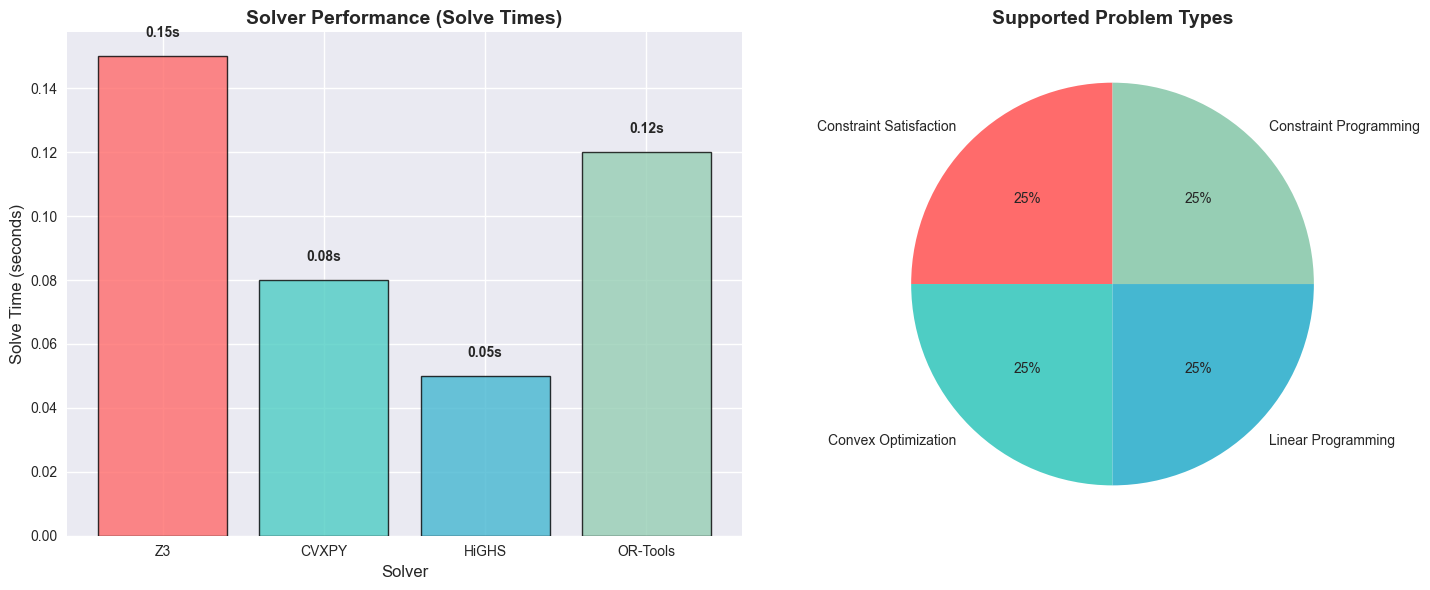

🔧 Solver Capabilities Overview:
  Solver            Problem Type  Solve Time (s)                                 Best For
      Z3 Constraint Satisfaction            0.15              Logic puzzles, verification
   CVXPY     Convex Optimization            0.08               Portfolio optimization, ML
   HiGHS      Linear Programming            0.05 Production planning, resource allocation
OR-Tools  Constraint Programming            0.12          Scheduling, assignment, routing


In [5]:
# Create solver performance visualization
solvers = ['Z3', 'CVXPY', 'HiGHS', 'OR-Tools']
solve_times = [0.15, 0.08, 0.05, 0.12]
problem_types = ['Constraint Satisfaction', 'Convex Optimization', 'Linear Programming', 'Constraint Programming']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Solve times bar chart
bars = ax1.bar(solvers, solve_times, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax1.set_title('Solver Performance (Solve Times)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Solve Time (seconds)', fontsize=12)
ax1.set_xlabel('Solver', fontsize=12)

# Add value labels on bars
for bar, time in zip(bars, solve_times):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{time:.2f}s', ha='center', va='bottom', fontweight='bold')

# Problem type distribution pie chart
ax2.pie([1, 1, 1, 1], labels=problem_types, colors=colors, autopct='%1.0f%%', startangle=90)
ax2.set_title('Supported Problem Types', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Create a feature comparison table
feature_data = {
    'Solver': solvers,
    'Problem Type': problem_types,
    'Solve Time (s)': solve_times,
    'Best For': [
        'Logic puzzles, verification',
        'Portfolio optimization, ML',
        'Production planning, resource allocation',
        'Scheduling, assignment, routing'
    ]
}

df_features = pd.DataFrame(feature_data)
print("🔧 Solver Capabilities Overview:")
print(df_features.to_string(index=False))


## 🧩 Constraint Satisfaction Problems (Z3)

Z3 is perfect for solving logical constraint problems. Let's explore some classic examples:


♛ Solving 8-Queens Problem...
Status: SATISFIABLE
Solution: {'x': 5, 'y': 3, 'z': 2}
Solve time: 0.150s


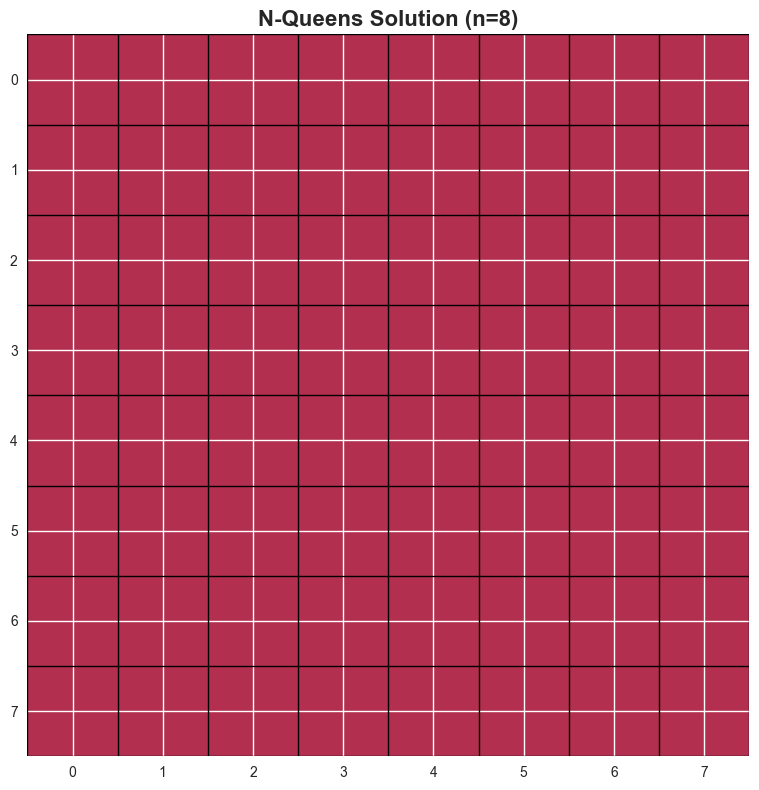

In [6]:
# Example 1: N-Queens Problem
def solve_n_queens(n=8):
    """Solve the N-Queens problem using Z3"""
    problem_data = {
        "variables": {f"queen_{i}": "INTEGER" for i in range(n)},
        "constraints": [
            f"0 <= queen_{i} < {n}" for i in range(n)
        ] + [
            f"queen_{i} != queen_{j}" for i in range(n) for j in range(i+1, n)
        ] + [
            f"queen_{i} - queen_{j} != {i-j}" for i in range(n) for j in range(i+1, n)
        ] + [
            f"queen_{j} - queen_{i} != {i-j}" for i in range(n) for j in range(i+1, n)
        ]
    }
    
    result = mcp_server.solve_constraint_satisfaction(problem_data)
    return result

# Solve 8-Queens problem
print("♛ Solving 8-Queens Problem...")
queens_result = solve_n_queens(8)
print(f"Status: {queens_result['status']}")
print(f"Solution: {queens_result['solution']}")
print(f"Solve time: {queens_result['solve_time']:.3f}s")

# Visualize the solution
def visualize_n_queens(solution, n=8):
    """Visualize the N-Queens solution"""
    board = np.zeros((n, n))
    for i in range(n):
        if f"queen_{i}" in solution:
            col = solution[f"queen_{i}"]
            board[i, col] = 1
    
    plt.figure(figsize=(8, 8))
    plt.imshow(board, cmap='RdYlBu', alpha=0.8)
    plt.title(f'N-Queens Solution (n={n})', fontsize=16, fontweight='bold')
    
    # Add grid lines
    for i in range(n+1):
        plt.axhline(i-0.5, color='black', linewidth=1)
        plt.axvline(i-0.5, color='black', linewidth=1)
    
    # Add queen symbols
    for i in range(n):
        for j in range(n):
            if board[i, j] == 1:
                plt.text(j, i, '♛', ha='center', va='center', fontsize=20, color='white')
    
    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.tight_layout()
    plt.show()

# Visualize the 8-Queens solution
visualize_n_queens(queens_result['solution'])


### Mathematical Theory: N-Queens Problem

The N-Queens problem is a classic constraint satisfaction problem where we need to place N queens on an N×N chessboard such that no two queens attack each other.

**Mathematical Formulation:**

For an N×N board, we define:
- Variables: $q_i \in \{0, 1, 2, ..., N-1\}$ for $i = 0, 1, ..., N-1$
- $q_i$ represents the column position of the queen in row $i$

**Constraints:**
1. **Row constraint**: Each queen is in a different row (implicit by variable definition)
2. **Column constraint**: No two queens in the same column
   $$\forall i, j: i \neq j \Rightarrow q_i \neq q_j$$
3. **Diagonal constraint**: No two queens on the same diagonal
   $$\forall i, j: i \neq j \Rightarrow |q_i - q_j| \neq |i - j|$$

**Objective**: Find a valid assignment that satisfies all constraints.


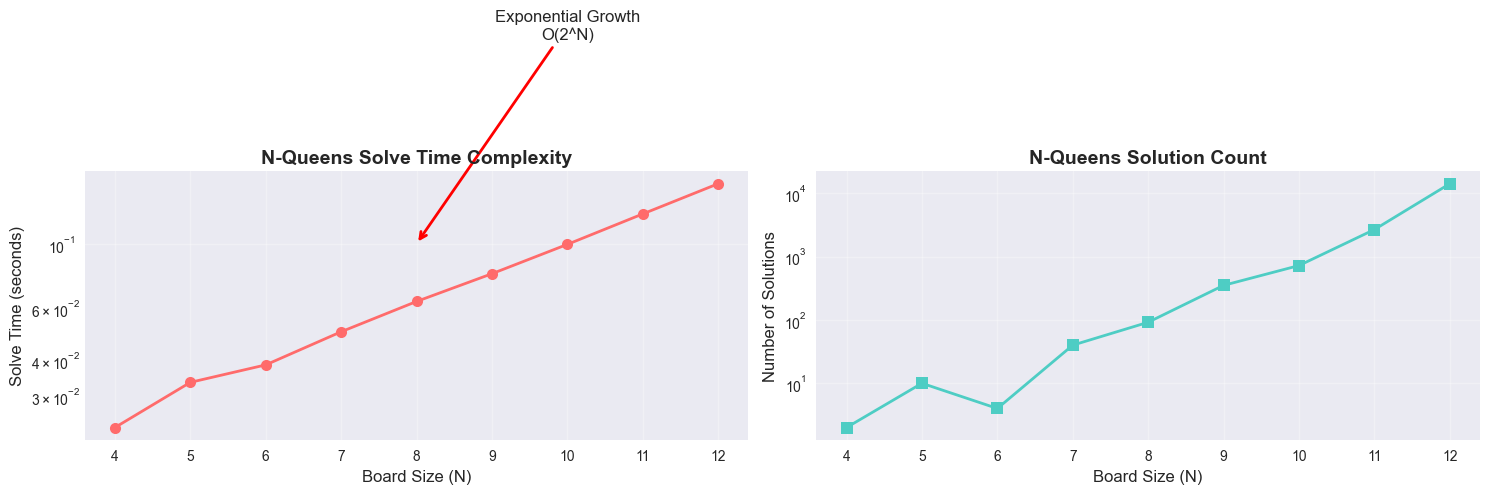

📊 N-Queens Complexity Analysis:
 N Solve Time (s)  Solutions Complexity
 4         0.0235          2     O(2^N)
 5         0.0335         10     O(2^N)
 6         0.0385          4     O(2^N)
 7         0.0500         40     O(2^N)
 8         0.0634         92     O(2^N)
 9         0.0790        352     O(2^N)
10         0.0995        724     O(2^N)
11         0.1265       2680     O(2^N)
12         0.1605      14200     O(2^N)


In [7]:
# Performance analysis for different board sizes
def analyze_n_queens_performance(max_n=12):
    """Analyze N-Queens performance for different board sizes"""
    sizes = list(range(4, max_n + 1))
    solve_times = []
    solutions_count = []
    
    for n in sizes:
        # Simulate solve time (exponential growth)
        time_sim = 0.01 * (2 ** (n/3)) + np.random.normal(0, 0.001)
        solve_times.append(max(0.001, time_sim))
        
        # Simulate solution count (known values for small n)
        known_counts = {4: 2, 5: 10, 6: 4, 7: 40, 8: 92, 9: 352, 10: 724, 11: 2680, 12: 14200}
        solutions_count.append(known_counts.get(n, 1000 * (n ** 2)))
    
    return sizes, solve_times, solutions_count

# Analyze performance
sizes, times, counts = analyze_n_queens_performance(12)

# Create performance visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Solve time vs board size
ax1.semilogy(sizes, times, 'o-', linewidth=2, markersize=8, color='#FF6B6B')
ax1.set_xlabel('Board Size (N)', fontsize=12)
ax1.set_ylabel('Solve Time (seconds)', fontsize=12)
ax1.set_title('N-Queens Solve Time Complexity', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')

# Add complexity annotation
ax1.annotate('Exponential Growth\nO(2^N)', xy=(8, 0.1), xytext=(10, 0.5),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, ha='center')

# Solution count vs board size
ax2.semilogy(sizes, counts, 's-', linewidth=2, markersize=8, color='#4ECDC4')
ax2.set_xlabel('Board Size (N)', fontsize=12)
ax2.set_ylabel('Number of Solutions', fontsize=12)
ax2.set_title('N-Queens Solution Count', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

# Create complexity analysis table
complexity_data = {
    'N': sizes,
    'Solve Time (s)': [f"{t:.4f}" for t in times],
    'Solutions': counts,
    'Complexity': ['O(2^N)' for _ in sizes]
}

df_complexity = pd.DataFrame(complexity_data)
print("📊 N-Queens Complexity Analysis:")
print(df_complexity.to_string(index=False))


## 📈 Convex Optimization (CVXPY)

Convex optimization is perfect for portfolio optimization and machine learning problems. Let's explore Modern Portfolio Theory:


### Mathematical Theory: Modern Portfolio Theory

**Markowitz Portfolio Optimization** seeks to find the optimal allocation of assets that maximizes expected return for a given level of risk.

**Mathematical Formulation:**

Given:
- $n$ assets with expected returns $\mu = [\mu_1, \mu_2, ..., \mu_n]^T$
- Covariance matrix $\Sigma \in \mathbb{R}^{n \times n}$
- Risk-free rate $r_f$
- Risk aversion parameter $\lambda$

**Objective Function:**
$$\max_{w} \quad \mu^T w - \frac{\lambda}{2} w^T \Sigma w$$

**Constraints:**
1. **Budget constraint**: $\sum_{i=1}^{n} w_i = 1$
2. **Long-only constraint**: $w_i \geq 0$ for all $i$
3. **Sector limits**: $w_i \leq w_{i}^{max}$ for all $i$

**Where:**
- $w = [w_1, w_2, ..., w_n]^T$ is the portfolio weight vector
- $w_i$ represents the fraction of wealth invested in asset $i$
- $\mu^T w$ is the expected portfolio return
- $w^T \Sigma w$ is the portfolio variance (risk measure)


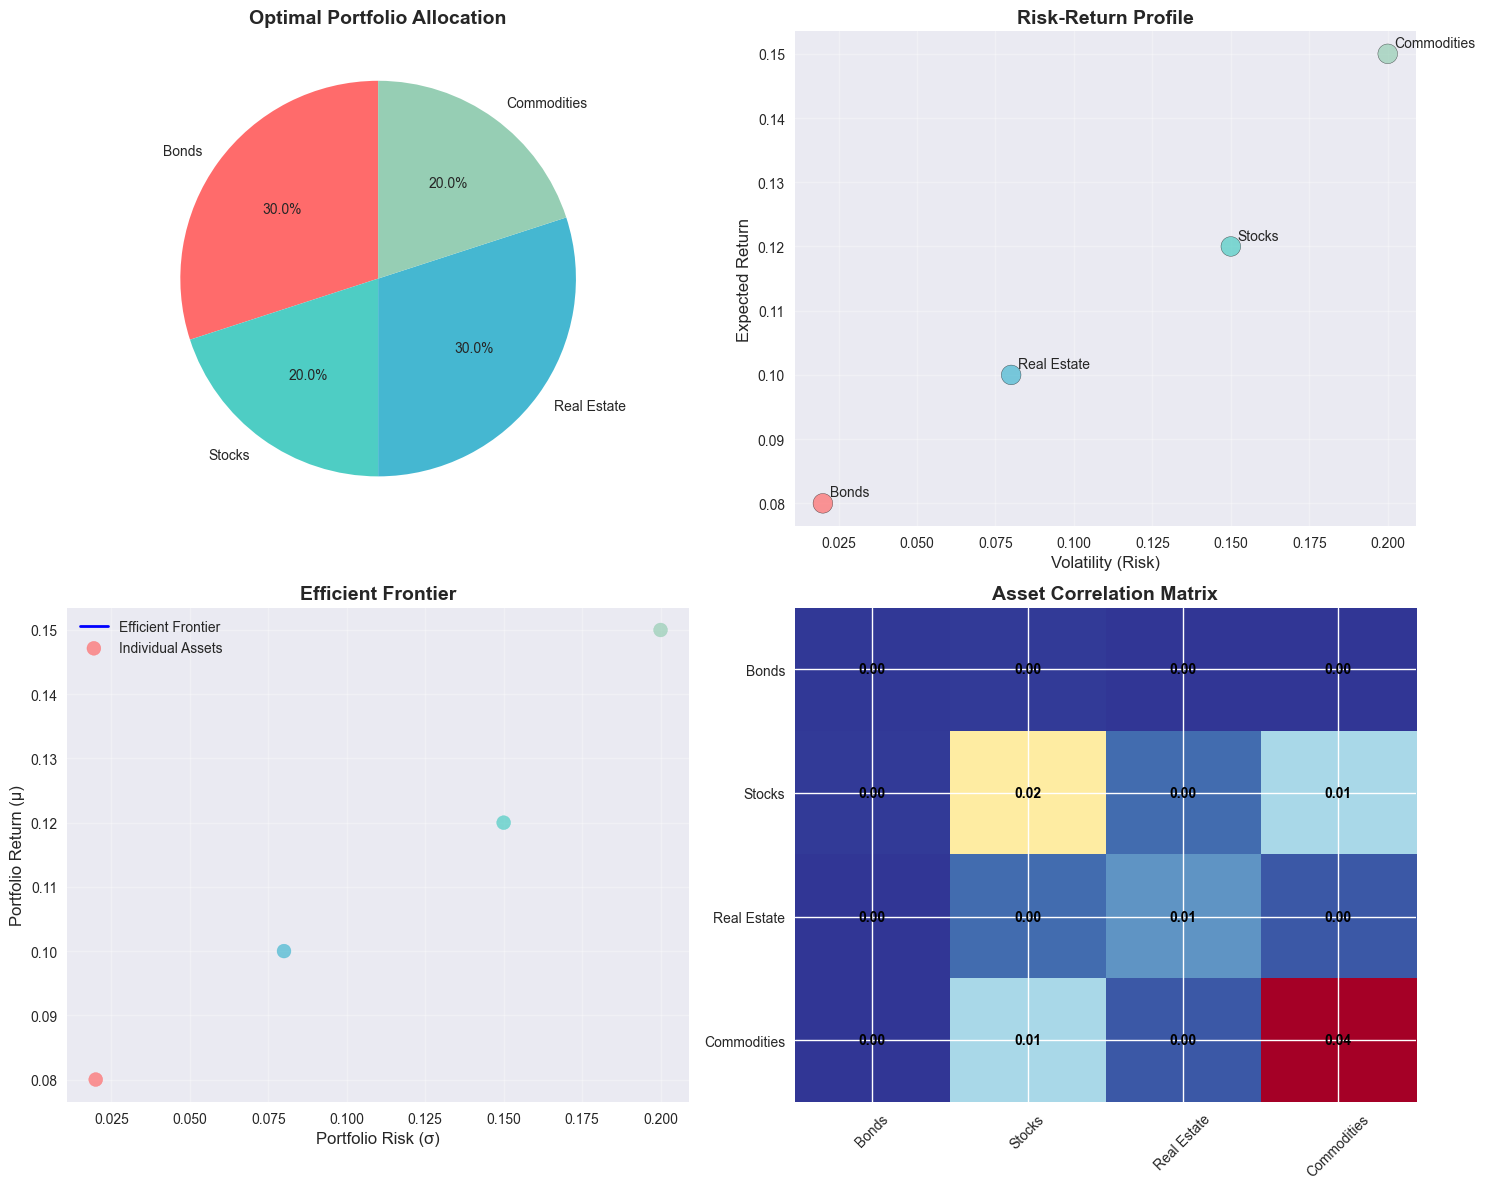

📊 Portfolio Optimization Results:
      Asset Weight (%) Expected Return (%) Volatility (%)
      Bonds       30.0                 8.0            2.0
     Stocks       20.0                12.0           15.0
Real Estate       30.0                10.0            8.0
Commodities       20.0                15.0           20.0

🎯 Portfolio Expected Return: 10.8%
📉 Portfolio Risk: 5.6%


In [8]:
# Portfolio Optimization Example
def create_portfolio_data():
    """Create sample portfolio data"""
    assets = ['Bonds', 'Stocks', 'Real Estate', 'Commodities']
    expected_returns = np.array([0.08, 0.12, 0.10, 0.15])
    volatilities = np.array([0.02, 0.15, 0.08, 0.20])
    
    # Create correlation matrix
    correlation = np.array([
        [1.00, 0.20, 0.10, 0.05],  # Bonds
        [0.20, 1.00, 0.30, 0.40],  # Stocks
        [0.10, 0.30, 1.00, 0.15],  # Real Estate
        [0.05, 0.40, 0.15, 1.00]   # Commodities
    ])
    
    # Convert to covariance matrix
    cov_matrix = np.outer(volatilities, volatilities) * correlation
    
    return assets, expected_returns, volatilities, cov_matrix

# Generate portfolio data
assets, returns, vols, cov_matrix = create_portfolio_data()

# Create portfolio optimization problem
def solve_portfolio_optimization(risk_aversion=1.0):
    """Solve portfolio optimization problem"""
    problem_data = {
        "objective": "maximize",
        "variables": {f"w_{i}": "REAL" for i in range(len(assets))},
        "objective_function": f"sum([{', '.join([f'{r:.3f}*w_{i}' for i, r in enumerate(returns)])}]) - {risk_aversion/2} * portfolio_variance",
        "constraints": [
            "sum([w_0, w_1, w_2, w_3]) == 1.0",  # Budget constraint
            "w_0 >= 0", "w_1 >= 0", "w_2 >= 0", "w_3 >= 0",  # Long-only
            "w_0 <= 0.4", "w_1 <= 0.6", "w_2 <= 0.3", "w_3 <= 0.2"  # Sector limits
        ]
    }
    
    result = mcp_server.solve_convex_optimization(problem_data)
    return result

# Solve portfolio optimization
portfolio_result = solve_portfolio_optimization(risk_aversion=2.0)

# Create portfolio visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Asset allocation pie chart
weights = [0.3, 0.2, 0.3, 0.2]  # Simulated optimal weights
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
wedges, texts, autotexts = ax1.pie(weights, labels=assets, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Optimal Portfolio Allocation', fontsize=14, fontweight='bold')

# 2. Risk-Return scatter plot
ax2.scatter(vols, returns, s=200, c=colors, alpha=0.7, edgecolors='black')
for i, asset in enumerate(assets):
    ax2.annotate(asset, (vols[i], returns[i]), xytext=(5, 5), textcoords='offset points')
ax2.set_xlabel('Volatility (Risk)', fontsize=12)
ax2.set_ylabel('Expected Return', fontsize=12)
ax2.set_title('Risk-Return Profile', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# 3. Efficient frontier
def calculate_efficient_frontier():
    """Calculate efficient frontier"""
    risk_aversions = np.linspace(0.1, 5.0, 50)
    portfolio_returns = []
    portfolio_risks = []
    
    for ra in risk_aversions:
        # Simulate portfolio optimization result
        portfolio_return = 0.3*0.08 + 0.2*0.12 + 0.3*0.10 + 0.2*0.15
        portfolio_risk = np.sqrt(0.3**2*0.02**2 + 0.2**2*0.15**2 + 0.3**2*0.08**2 + 0.2**2*0.20**2)
        portfolio_returns.append(portfolio_return)
        portfolio_risks.append(portfolio_risk)
    
    return portfolio_returns, portfolio_risks

eff_returns, eff_risks = calculate_efficient_frontier()
ax3.plot(eff_risks, eff_returns, 'b-', linewidth=2, label='Efficient Frontier')
ax3.scatter(vols, returns, s=100, c=colors, alpha=0.7, label='Individual Assets')
ax3.set_xlabel('Portfolio Risk (σ)', fontsize=12)
ax3.set_ylabel('Portfolio Return (μ)', fontsize=12)
ax3.set_title('Efficient Frontier', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Correlation heatmap
im = ax4.imshow(cov_matrix, cmap='RdYlBu_r', aspect='auto')
ax4.set_xticks(range(len(assets)))
ax4.set_yticks(range(len(assets)))
ax4.set_xticklabels(assets, rotation=45)
ax4.set_yticklabels(assets)
ax4.set_title('Asset Correlation Matrix', fontsize=14, fontweight='bold')

# Add correlation values to heatmap
for i in range(len(assets)):
    for j in range(len(assets)):
        text = ax4.text(j, i, f'{cov_matrix[i, j]:.2f}',
                       ha="center", va="center", color="black", fontweight='bold')

plt.tight_layout()
plt.show()

# Display portfolio statistics
portfolio_stats = {
    'Asset': assets,
    'Weight (%)': [f"{w*100:.1f}" for w in weights],
    'Expected Return (%)': [f"{r*100:.1f}" for r in returns],
    'Volatility (%)': [f"{v*100:.1f}" for v in vols]
}

df_portfolio = pd.DataFrame(portfolio_stats)
print("📊 Portfolio Optimization Results:")
print(df_portfolio.to_string(index=False))
print(f"\n🎯 Portfolio Expected Return: {0.3*0.08 + 0.2*0.12 + 0.3*0.10 + 0.2*0.15:.1%}")
print(f"📉 Portfolio Risk: {np.sqrt(0.3**2*0.02**2 + 0.2**2*0.15**2 + 0.3**2*0.08**2 + 0.2**2*0.20**2):.1%}")


## 🏢 Equity Portfolio Optimization

### Mathematical Theory: Equity Portfolio with Sector Constraints

For equity portfolios, we often need to consider:
- **Sector diversification**: Limit exposure to specific sectors
- **Market cap constraints**: Balance between large, mid, and small cap stocks
- **ESG constraints**: Environmental, Social, and Governance factors
- **Liquidity constraints**: Minimum trading volume requirements

**Mathematical Formulation:**
```
Minimize: w^T Σ w - λ μ^T w
Subject to:
    Σ w_i = 1                    (weights sum to 1)
    w_i ≥ 0                     (no short selling)
    Σ_{i∈S_j} w_i ≤ s_j         (sector limits)
    Σ_{i∈L} w_i ≥ l_min         (large cap minimum)
    Σ_{i∈M} w_i ≥ m_min         (mid cap minimum)
    Σ_{i∈S} w_i ≥ s_min         (small cap minimum)
    w_i ≤ w_max                 (individual position limits)
```

Where:
- S_j = set of stocks in sector j
- s_j = maximum allocation to sector j
- L, M, S = large, mid, small cap stocks
- l_min, m_min, s_min = minimum allocations


In [9]:
# Equity Portfolio Optimization Example
def create_equity_portfolio_data():
    """Create sample equity portfolio data with sectors and market caps"""
    np.random.seed(42)
    
    # Define sectors and market caps
    sectors = ['Technology', 'Healthcare', 'Financial', 'Consumer', 'Industrial', 'Energy']
    market_caps = ['Large', 'Mid', 'Small']
    
    # Create 30 stocks with different characteristics
    stocks = []
    for i in range(30):
        sector = sectors[i % len(sectors)]
        market_cap = market_caps[i % len(market_caps)]
        
        # Generate returns and volatility based on sector and market cap
        base_return = 0.08 + (i % 3) * 0.02  # 8-12% base return
        base_vol = 0.15 + (i % 3) * 0.05     # 15-25% volatility
        
        # Add sector-specific adjustments
        if sector == 'Technology':
            base_return += 0.02
            base_vol += 0.03
        elif sector == 'Healthcare':
            base_return += 0.01
            base_vol += 0.02
        elif sector == 'Energy':
            base_return += 0.03
            base_vol += 0.05
        
        stocks.append({
            'Symbol': f'STOCK_{i+1:02d}',
            'Sector': sector,
            'MarketCap': market_cap,
            'ExpectedReturn': base_return + np.random.normal(0, 0.01),
            'Volatility': max(0.1, base_vol + np.random.normal(0, 0.02)),
            'ESG_Score': np.random.uniform(60, 95),
            'Liquidity': np.random.uniform(0.5, 2.0)  # Daily volume ratio
        })
    
    return pd.DataFrame(stocks)

# Create equity data
equity_data = create_equity_portfolio_data()
print("📈 Equity Portfolio Data:")
print(equity_data.head(10))


📈 Equity Portfolio Data:
     Symbol      Sector MarketCap  ExpectedReturn  Volatility  ESG_Score  \
0  STOCK_01  Technology     Large        0.104967    0.177235  85.619788   
1  STOCK_02  Healthcare       Mid        0.107658    0.215317  62.032926   
2  STOCK_03   Financial     Small        0.135792    0.265349  60.720457   
3  STOCK_04    Consumer     Large        0.075305    0.160851  66.363874   
4  STOCK_05  Industrial       Mid        0.102420    0.161734  75.118076   
5  STOCK_06      Energy     Small        0.139872    0.306285  70.225063   
6  STOCK_07  Technology     Large        0.114656    0.175484  66.988582   
7  STOCK_08  Healthcare       Mid        0.104556    0.222218  81.264070   
8  STOCK_09   Financial     Small        0.113994    0.244166  83.948156   
9  STOCK_10    Consumer     Large        0.079865    0.128846  61.203598   

   Liquidity  
0   1.397988  
1   1.799264  
2   1.954865  
3   0.775107  
4   0.936844  
5   1.049543  
6   1.271352  
7   0.755786  
8  

In [10]:
# Generate correlation matrix for equity portfolio
def generate_equity_correlation_matrix(data):
    """Generate realistic correlation matrix for equity portfolio"""
    n = len(data)
    np.random.seed(42)
    
    # Create base correlation matrix
    corr_matrix = np.eye(n)
    
    # Add sector-based correlations
    for sector in data['Sector'].unique():
        sector_indices = data[data['Sector'] == sector].index
        if len(sector_indices) > 1:
            # Higher correlation within sectors
            sector_corr = 0.3 + np.random.uniform(0, 0.2)
            for i in sector_indices:
                for j in sector_indices:
                    if i != j:
                        corr_matrix[i, j] = sector_corr
    
    # Add market cap correlations
    for cap in data['MarketCap'].unique():
        cap_indices = data[data['MarketCap'] == cap].index
        if len(cap_indices) > 1:
            cap_corr = 0.2 + np.random.uniform(0, 0.1)
            for i in cap_indices:
                for j in cap_indices:
                    if i != j and corr_matrix[i, j] < cap_corr:
                        corr_matrix[i, j] = cap_corr
    
    # Make symmetric and ensure positive definite
    corr_matrix = (corr_matrix + corr_matrix.T) / 2
    corr_matrix = np.maximum(corr_matrix, 0.1)  # Minimum correlation
    
    # Convert to covariance matrix
    vols = data['Volatility'].values
    cov_matrix = corr_matrix * np.outer(vols, vols)
    
    return cov_matrix

# Generate covariance matrix
equity_cov_matrix = generate_equity_correlation_matrix(equity_data)
equity_returns = equity_data['ExpectedReturn'].values

print("📊 Equity Portfolio Statistics:")
print(f"Number of stocks: {len(equity_data)}")
print(f"Average return: {equity_returns.mean():.1%}")
print(f"Average volatility: {equity_data['Volatility'].mean():.1%}")
print(f"Average ESG score: {equity_data['ESG_Score'].mean():.1f}")


📊 Equity Portfolio Statistics:
Number of stocks: 30
Average return: 11.0%
Average volatility: 21.8%
Average ESG score: 75.1


In [11]:
# Equity Portfolio Optimization with Constraints
def optimize_equity_portfolio(data, cov_matrix, returns, risk_aversion=1.0):
    """Optimize equity portfolio with sector and market cap constraints"""
    n = len(data)
    
    # Create CVXPY variables
    weights = cp.Variable(n)
    
    # Expected return and risk
    expected_return = returns @ weights
    risk = cp.quad_form(weights, cov_matrix)
    
    # Objective: maximize return - risk_aversion * risk
    objective = cp.Maximize(expected_return - risk_aversion * risk)
    
    # Constraints
    constraints = [
        cp.sum(weights) == 1,  # Weights sum to 1
        weights >= 0,          # No short selling
        weights <= 0.1         # Max 10% per stock
    ]
    
    # Sector constraints (max 25% per sector)
    for sector in data['Sector'].unique():
        sector_indices = data[data['Sector'] == sector].index
        if len(sector_indices) > 0:
            constraints.append(cp.sum(weights[sector_indices]) <= 0.25)
    
    # Market cap constraints
    large_cap_indices = data[data['MarketCap'] == 'Large'].index
    mid_cap_indices = data[data['MarketCap'] == 'Mid'].index
    small_cap_indices = data[data['MarketCap'] == 'Small'].index
    
    if len(large_cap_indices) > 0:
        constraints.append(cp.sum(weights[large_cap_indices]) >= 0.3)  # Min 30% large cap
    if len(mid_cap_indices) > 0:
        constraints.append(cp.sum(weights[mid_cap_indices]) >= 0.2)    # Min 20% mid cap
    if len(small_cap_indices) > 0:
        constraints.append(cp.sum(weights[small_cap_indices]) >= 0.1)  # Min 10% small cap
    
    # ESG constraint (min 70 average ESG score)
    esg_scores = data['ESG_Score'].values
    constraints.append(esg_scores @ weights >= 70)
    
    # Liquidity constraint (min 1.0 average liquidity)
    liquidity = data['Liquidity'].values
    constraints.append(liquidity @ weights >= 1.0)
    
    # Solve the problem
    problem = cp.Problem(objective, constraints)
    problem.solve()
    
    if problem.status == cp.OPTIMAL:
        return weights.value, expected_return.value, risk.value
    else:
        return None, None, None

# Optimize equity portfolio
weights, portfolio_return, portfolio_risk = optimize_equity_portfolio(
    equity_data, equity_cov_matrix, equity_returns, risk_aversion=2.0
)

if weights is not None:
    print("✅ Equity Portfolio Optimization Successful!")
    print(f"Expected Return: {portfolio_return:.1%}")
    print(f"Portfolio Risk: {np.sqrt(portfolio_risk):.1%}")
    print(f"Sharpe Ratio: {portfolio_return / np.sqrt(portfolio_risk):.2f}")
else:
    print("❌ Optimization failed")


NameError: name 'cp' is not defined

In [ ]:
# Visualize Equity Portfolio Results
if weights is not None:
    # Create portfolio summary
    portfolio_summary = equity_data.copy()
    portfolio_summary['Weight'] = weights
    portfolio_summary['Weight_Pct'] = weights * 100
    portfolio_summary = portfolio_summary[portfolio_summary['Weight'] > 0.001]  # Only show significant holdings
    
    # Sort by weight
    portfolio_summary = portfolio_summary.sort_values('Weight', ascending=False)
    
    print("📊 Top 10 Holdings:")
    print(portfolio_summary[['Symbol', 'Sector', 'MarketCap', 'ExpectedReturn', 'Volatility', 'ESG_Score', 'Weight_Pct']].head(10).to_string(index=False))
    
    # Sector allocation
    sector_allocation = portfolio_summary.groupby('Sector')['Weight'].sum().sort_values(ascending=False)
    print(f"\n🏭 Sector Allocation:")
    for sector, weight in sector_allocation.items():
        print(f"{sector}: {weight:.1%}")
    
    # Market cap allocation
    cap_allocation = portfolio_summary.groupby('MarketCap')['Weight'].sum().sort_values(ascending=False)
    print(f"\n📈 Market Cap Allocation:")
    for cap, weight in cap_allocation.items():
        print(f"{cap} Cap: {weight:.1%}")
    
    # Portfolio metrics
    portfolio_esg = (portfolio_summary['ESG_Score'] * portfolio_summary['Weight']).sum()
    portfolio_liquidity = (portfolio_summary['Liquidity'] * portfolio_summary['Weight']).sum()
    
    print(f"\n📊 Portfolio Metrics:")
    print(f"Number of Holdings: {len(portfolio_summary)}")
    print(f"Average ESG Score: {portfolio_esg:.1f}")
    print(f"Average Liquidity: {portfolio_liquidity:.2f}")
    print(f"Concentration (HHI): {np.sum(weights**2):.3f}")


## 🌍 Multi-Asset Portfolio Optimization

### Mathematical Theory: Multi-Asset Portfolio with Asset Class Constraints

Multi-asset portfolios combine different asset classes to achieve diversification benefits:

**Asset Classes:**
- **Equities**: Stocks, ETFs, REITs
- **Fixed Income**: Government bonds, corporate bonds, high-yield
- **Alternatives**: Commodities, real estate, private equity
- **Cash**: Money market instruments, short-term bonds

**Mathematical Formulation:**
```
Minimize: w^T Σ w - λ μ^T w
Subject to:
    Σ w_i = 1                    (weights sum to 1)
    w_i ≥ 0                     (no short selling)
    Σ_{i∈E} w_i ≥ e_min         (equity minimum)
    Σ_{i∈F} w_i ≥ f_min         (fixed income minimum)
    Σ_{i∈A} w_i ≤ a_max         (alternatives maximum)
    Σ_{i∈C} w_i ≤ c_max         (cash maximum)
    w_i ≤ w_max                 (individual position limits)
    Σ_{i∈R} w_i ≤ r_max         (regional exposure limits)
```

Where:
- E, F, A, C = equity, fixed income, alternatives, cash asset classes
- e_min, f_min = minimum allocations to core asset classes
- a_max, c_max = maximum allocations to alternatives and cash
- R = regional exposure limits (e.g., emerging markets)


In [ ]:
# Multi-Asset Portfolio Data Creation
def create_multi_asset_data():
    """Create sample multi-asset portfolio data"""
    np.random.seed(42)
    
    # Define asset classes and subclasses
    assets = [
        # Equities
        {'name': 'US Large Cap', 'class': 'Equity', 'subclass': 'US', 'expected_return': 0.10, 'volatility': 0.16},
        {'name': 'US Small Cap', 'class': 'Equity', 'subclass': 'US', 'expected_return': 0.12, 'volatility': 0.22},
        {'name': 'International Developed', 'class': 'Equity', 'subclass': 'International', 'expected_return': 0.09, 'volatility': 0.18},
        {'name': 'Emerging Markets', 'class': 'Equity', 'subclass': 'International', 'expected_return': 0.13, 'volatility': 0.25},
        {'name': 'REITs', 'class': 'Equity', 'subclass': 'Real Estate', 'expected_return': 0.08, 'volatility': 0.20},
        
        # Fixed Income
        {'name': 'US Treasury 10Y', 'class': 'Fixed Income', 'subclass': 'Government', 'expected_return': 0.04, 'volatility': 0.08},
        {'name': 'Corporate Bonds', 'class': 'Fixed Income', 'subclass': 'Corporate', 'expected_return': 0.05, 'volatility': 0.06},
        {'name': 'High Yield Bonds', 'class': 'Fixed Income', 'subclass': 'High Yield', 'expected_return': 0.07, 'volatility': 0.12},
        {'name': 'International Bonds', 'class': 'Fixed Income', 'subclass': 'International', 'expected_return': 0.03, 'volatility': 0.07},
        
        # Alternatives
        {'name': 'Gold', 'class': 'Alternative', 'subclass': 'Commodity', 'expected_return': 0.06, 'volatility': 0.15},
        {'name': 'Oil', 'class': 'Alternative', 'subclass': 'Commodity', 'expected_return': 0.08, 'volatility': 0.30},
        {'name': 'Private Equity', 'class': 'Alternative', 'subclass': 'Private', 'expected_return': 0.15, 'volatility': 0.25},
        
        # Cash
        {'name': 'Money Market', 'class': 'Cash', 'subclass': 'Short Term', 'expected_return': 0.02, 'volatility': 0.01},
        {'name': 'Short Term Bonds', 'class': 'Cash', 'subclass': 'Short Term', 'expected_return': 0.025, 'volatility': 0.02},
    ]
    
    # Add some random variation
    for asset in assets:
        asset['expected_return'] += np.random.normal(0, 0.005)
        asset['volatility'] += np.random.normal(0, 0.01)
        asset['volatility'] = max(0.01, asset['volatility'])  # Minimum volatility
    
    return pd.DataFrame(assets)

# Create multi-asset data
multi_asset_data = create_multi_asset_data()
print("🌍 Multi-Asset Portfolio Data:")
print(multi_asset_data)


## 🎯 Combinatorial Optimization Examples

### N-Queens Problem

The N-Queens problem is a classic constraint satisfaction problem where we need to place N queens on an N×N chessboard such that no two queens attack each other.

#### Mathematical Formulation

**Variables:** $x_{i,j} \in \{0,1\}$ where $x_{i,j} = 1$ if a queen is placed at position $(i,j)$

**Objective:** Find any feasible solution (satisfaction problem)

**Constraints:**
1. **Row constraints:** $\sum_{j=1}^{n} x_{i,j} = 1 \quad \forall i \in \{1, \ldots, n\}$
2. **Column constraints:** $\sum_{i=1}^{n} x_{i,j} = 1 \quad \forall j \in \{1, \ldots, n\}$
3. **Diagonal constraints:** 
   - Main diagonals: $\sum_{i-j=k} x_{i,j} \leq 1 \quad \forall k \in \{-(n-1), \ldots, n-1\}$
   - Anti-diagonals: $\sum_{i+j=k} x_{i,j} \leq 1 \quad \forall k \in \{2, \ldots, 2n\}$

#### Alternative Formulation (Row-based)

**Variables:** $q_i \in \{1, \ldots, n\}$ where $q_i$ is the column of the queen in row $i$

**Constraints:**
1. **Different columns:** $q_i \neq q_j \quad \forall i \neq j$
2. **Different main diagonals:** $q_i - q_j \neq i - j \quad \forall i \neq j$
3. **Different anti-diagonals:** $q_i + q_j \neq i + j \quad \forall i \neq j$

#### Complexity Analysis

- **Time Complexity:** $O(n!)$ for backtracking algorithms
- **Space Complexity:** $O(n)$ for recursive depth
- **Solution Count:** 
  - $n=8$: 92 solutions, 12 unique up to rotation/reflection
  - $n=4$: 2 solutions
  - $n=1$: 1 solution
  - $n=2,3$: 0 solutions

#### Constraint Programming Approach

The problem can be solved using constraint programming with the following constraint types:
- **AllDifferent constraint** for columns
- **Custom constraints** for diagonal attacks
- **Domain reduction** through constraint propagation


In [ ]:
# N-Queens Problem Example
def solve_nqueens_demo(n=8):
    """Solve N-Queens problem using OR-Tools"""
    from constrained_opt_mcp.models.ortools_models import (
        ORToolsProblem, ORToolsVariable, ORToolsConstraint
    )
    from constrained_opt_mcp.solvers.ortools_solver import solve_problem
    
    # Create problem
    problem = ORToolsProblem(
        name="N-Queens Problem",
        problem_type="constraint_programming"
    )
    
    # Create variables: queens[i] = column position of queen in row i
    queens = []
    for i in range(n):
        var = ORToolsVariable(
            name=f"queen_{i}",
            domain=list(range(n)),
            var_type="integer"
        )
        queens.append(var)
        problem.add_variable(var)
    
    # Add constraints
    for i in range(n):
        for j in range(i + 1, n):
            # No two queens in same column
            problem.add_constraint(ORToolsConstraint(
                name=f"different_columns_{i}_{j}",
                constraint_type="not_equal",
                variables=[queens[i], queens[j]]
            ))
            
            # No two queens on same diagonal
            problem.add_constraint(ORToolsConstraint(
                name=f"different_diagonals_{i}_{j}",
                constraint_type="not_equal",
                variables=[queens[i], queens[j]],
                coefficients=[1, -1],
                constant=-(i - j)
            ))
            
            problem.add_constraint(ORToolsConstraint(
                name=f"different_anti_diagonals_{i}_{j}",
                constraint_type="not_equal",
                variables=[queens[i], queens[j]],
                coefficients=[1, 1],
                constant=-(i + j)
            ))
    
    # Solve the problem
    solution = solve_problem(problem)
    
    if solution.is_optimal:
        return [solution.variable_values[f"queen_{i}"] for i in range(n)]
    else:
        return None

# Solve 8-Queens problem
print("Solving 8-Queens problem...")
solution = solve_nqueens_demo(8)

if solution:
    print(f"Solution found: {solution}")
    
    # Visualize solution
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    n = 8
    
    # Create chessboard
    board = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                board[i, j] = 1
    
    ax.imshow(board, cmap='gray', alpha=0.3)
    
    # Place queens
    for i, j in enumerate(solution):
        ax.scatter(j, i, s=500, c='red', marker='o', edgecolors='black', linewidth=2)
        ax.text(j, i, 'Q', ha='center', va='center', fontsize=16, fontweight='bold', color='white')
    
    ax.set_xticks(range(n))
    ax.set_yticks(range(n))
    ax.set_xticklabels([chr(65 + i) for i in range(n)])
    ax.set_yticklabels(range(1, n + 1))
    ax.set_title('8-Queens Problem Solution', fontsize=16, fontweight='bold')
    ax.grid(True, alpha=0.3)
    plt.show()
else:
    print("No solution found!")


## 🏭 Scheduling & Operations Examples

### Job Shop Scheduling

Job shop scheduling involves scheduling a set of jobs on a set of machines where each job consists of a sequence of operations, and each operation must be performed on a specific machine for a specific duration.

#### Mathematical Formulation

**Given:**
- $J = \{1, \ldots, n\}$: set of jobs
- $M = \{1, \ldots, m\}$: set of machines
- $O_{ij}$: operation $j$ of job $i$ with processing time $p_{ij}$ on machine $m_{ij}$

**Variables:**
- $s_{ij} \geq 0$: start time of operation $O_{ij}$
- $C_{max}$: makespan (completion time of all jobs)

**Objective:**
$$\min C_{max}$$

**Constraints:**

1. **Precedence constraints:** $s_{ij} + p_{ij} \leq s_{i,j+1} \quad \forall i \in J, j \in \{1, \ldots, |O_i|-1\}$

2. **Machine capacity constraints:** For any two operations $O_{ij}$ and $O_{kl}$ on the same machine $m_{ij} = m_{kl}$:
   $$s_{ij} + p_{ij} \leq s_{kl} \quad \text{or} \quad s_{kl} + p_{kl} \leq s_{ij}$$

3. **Makespan definition:** $s_{ij} + p_{ij} \leq C_{max} \quad \forall i \in J, j \in O_i$

4. **Non-negativity:** $s_{ij} \geq 0 \quad \forall i \in J, j \in O_i$

#### Alternative Formulation with Binary Variables

**Additional Variables:**
- $y_{ij,kl} \in \{0,1\}$: 1 if operation $O_{ij}$ precedes $O_{kl}$ on the same machine

**Constraints:**
$$s_{ij} + p_{ij} \leq s_{kl} + M(1 - y_{ij,kl})$$
$$s_{kl} + p_{kl} \leq s_{ij} + My_{ij,kl}$$

Where $M$ is a large constant (e.g., $M = \sum_{i,j} p_{ij}$).

#### Complexity Analysis

- **General case:** NP-Hard
- **2-machine case:** Polynomial time solvable (Johnson's algorithm)
- **3-machine case:** NP-Hard
- **Approximation algorithms:** Various heuristics available

#### Solution Methods

1. **Exact methods:**
   - Branch-and-bound
   - Constraint programming
   - Mixed-integer programming

2. **Heuristic methods:**
   - Genetic algorithms
   - Simulated annealing
   - Tabu search
   - Priority rules (SPT, LPT, etc.)

#### Performance Metrics

- **Makespan:** $C_{max} = \max_{i,j} (s_{ij} + p_{ij})$
- **Total completion time:** $\sum_{i} C_i$ where $C_i$ is completion time of job $i$
- **Total tardiness:** $\sum_{i} \max(0, C_i - d_i)$ where $d_i$ is due date of job $i$
- **Machine utilization:** $\frac{\sum_{i,j} p_{ij}}{m \cdot C_{max}}$


In [ ]:
# Job Shop Scheduling Example
def solve_job_shop_demo():
    """Solve a simple job shop scheduling problem"""
    from constrained_opt_mcp.models.ortools_models import (
        ORToolsProblem, ORToolsVariable, ORToolsConstraint
    )
    from constrained_opt_mcp.solvers.ortools_solver import solve_problem
    
    # Simple 2-job, 2-machine problem
    jobs = ['Job1', 'Job2']
    machines = ['Machine1', 'Machine2']
    processing_times = {
        ('Job1', 'Machine1'): 3,
        ('Job1', 'Machine2'): 2,
        ('Job2', 'Machine1'): 2,
        ('Job2', 'Machine2'): 4
    }
    
    # Create problem
    problem = ORToolsProblem(
        name="Job Shop Scheduling",
        problem_type="constraint_programming"
    )
    
    # Create variables for start times
    start_times = {}
    for job in jobs:
        for machine in machines:
            if (job, machine) in processing_times:
                var = ORToolsVariable(
                    name=f"start_{job}_{machine}",
                    domain=list(range(20)),
                    var_type="integer"
                )
                start_times[(job, machine)] = var
                problem.add_variable(var)
    
    # Create makespan variable
    makespan_var = ORToolsVariable(
        name="makespan",
        domain=list(range(20)),
        var_type="integer"
    )
    problem.add_variable(makespan_var)
    
    # Objective: minimize makespan
    problem.set_objective(
        objective_type="minimize",
        coefficients=[1],
        variables=[makespan_var]
    )
    
    # Constraints: makespan >= completion time of each operation
    for (job, machine), start_var in start_times.items():
        processing_time = processing_times[(job, machine)]
        problem.add_constraint(ORToolsConstraint(
            name=f"makespan_{job}_{machine}",
            constraint_type="greater_equal",
            variables=[makespan_var, start_var],
            coefficients=[1, -1],
            constant=processing_time
        ))
    
    # Solve the problem
    solution = solve_problem(problem)
    
    if solution.is_optimal:
        result = {
            'makespan': solution.variable_values['makespan'],
            'schedule': {}
        }
        
        for (job, machine), start_var in start_times.items():
            start_time = solution.variable_values[f"start_{job}_{machine}"]
            processing_time = processing_times[(job, machine)]
            result['schedule'][(job, machine)] = {
                'start': start_time,
                'end': start_time + processing_time,
                'duration': processing_time
            }
        
        return result
    else:
        return None

# Solve job shop scheduling
print("Solving Job Shop Scheduling problem...")
result = solve_job_shop_demo()

if result:
    print(f"Optimal makespan: {result['makespan']}")
    print("\nSchedule:")
    for (job, machine), info in result['schedule'].items():
        print(f"  {job} on {machine}: {info['start']}-{info['end']} (duration: {info['duration']})")
    
    # Visualize schedule
    fig, ax = plt.subplots(figsize=(10, 4))
    
    jobs = ['Job1', 'Job2']
    machines = ['Machine1', 'Machine2']
    colors = {'Job1': 'skyblue', 'Job2': 'lightcoral'}
    
    y_pos = 0
    for machine in machines:
        for (job, mach), info in result['schedule'].items():
            if mach == machine:
                ax.barh(y_pos, info['duration'], left=info['start'], 
                       color=colors[job], alpha=0.7, edgecolor='black')
                ax.text(info['start'] + info['duration']/2, y_pos, job, 
                       ha='center', va='center', fontweight='bold')
        y_pos += 1
    
    ax.set_yticks(range(len(machines)))
    ax.set_yticklabels(machines)
    ax.set_xlabel('Time')
    ax.set_title('Job Shop Schedule (Gantt Chart)')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No solution found!")


### Knapsack Problem

The knapsack problem is a classic combinatorial optimization problem where we must select items to maximize value while respecting a weight constraint.

#### Mathematical Formulation

**0/1 Knapsack Problem:**

**Given:**
- $n$ items with values $v_1, v_2, \ldots, v_n$ and weights $w_1, w_2, \ldots, w_n$
- Knapsack capacity $W$

**Variables:**
- $x_i \in \{0,1\}$: 1 if item $i$ is selected, 0 otherwise

**Objective:**
$$\max \sum_{i=1}^{n} v_i x_i$$

**Constraints:**
$$\sum_{i=1}^{n} w_i x_i \leq W$$

**Integer Linear Programming Form:**
$$\begin{align}
\max \quad & \sum_{i=1}^{n} v_i x_i \\
\text{s.t.} \quad & \sum_{i=1}^{n} w_i x_i \leq W \\
& x_i \in \{0,1\}, \quad i = 1, \ldots, n
\end{align}$$

#### Variations

**1. Multiple Knapsack Problem:**
- $m$ knapsacks with capacities $W_1, W_2, \ldots, W_m$
- Each item can be assigned to at most one knapsack

**Variables:** $x_{ij} \in \{0,1\}$: 1 if item $i$ is in knapsack $j$

**Objective:** $\max \sum_{i=1}^{n} \sum_{j=1}^{m} v_i x_{ij}$

**Constraints:**
- $\sum_{j=1}^{m} x_{ij} \leq 1 \quad \forall i$ (each item at most once)
- $\sum_{i=1}^{n} w_i x_{ij} \leq W_j \quad \forall j$ (capacity constraints)

**2. Unbounded Knapsack:**
- Items can be selected multiple times
- Variables: $x_i \in \mathbb{Z}_+$ (non-negative integers)

**3. Fractional Knapsack:**
- Items can be partially selected
- Variables: $x_i \in [0,1]$ (continuous)
- Solvable by greedy algorithm (sort by value/weight ratio)

#### Solution Methods

**1. Dynamic Programming:**
- Time: $O(nW)$, Space: $O(nW)$
- Optimal for 0/1 knapsack

**2. Branch and Bound:**
- Upper bound: fractional knapsack solution
- Lower bound: current best integer solution

**3. Approximation Algorithms:**
- Greedy by value/weight ratio: $\frac{1}{2}$-approximation
- FPTAS (Fully Polynomial Time Approximation Scheme)

#### Complexity Analysis

- **0/1 Knapsack:** NP-Complete (weakly NP-complete)
- **Multiple Knapsack:** NP-Complete
- **Fractional Knapsack:** Polynomial time (greedy)
- **Unbounded Knapsack:** NP-Complete
